## We can put a linear model in a sigmoid function to convert in a logistic model(value lies bw 0 & 1)

In [81]:
import pandas as pd
import numpy as np

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
train = pd.read_csv('titanic_train.csv')  

In [84]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

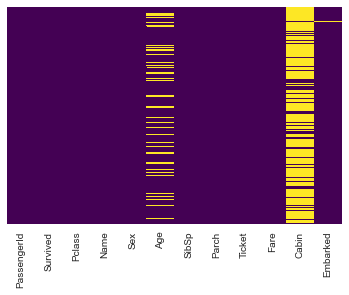

In [85]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [86]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

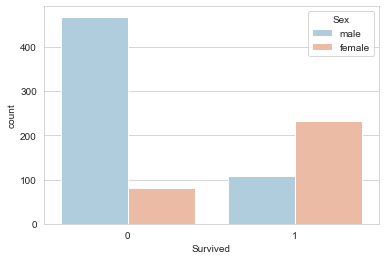

In [87]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')   # We can see more men died, & more women survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

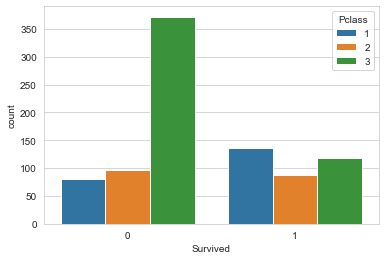

In [88]:
sns.countplot(x='Survived', hue='Pclass', data=train) # We can see people more of 3rd class died amd Upper class survived more.

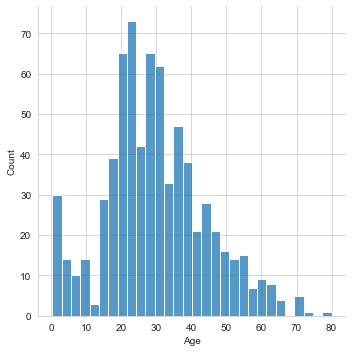

In [89]:
sns.displot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

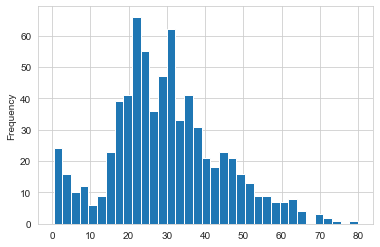

In [90]:
train['Age'].plot.hist(bins=35)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

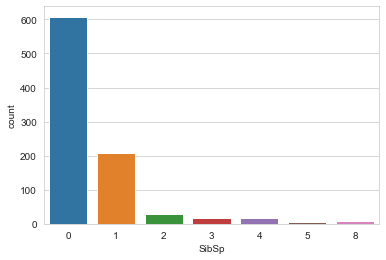

In [92]:
sns.countplot(x='SibSp', data=train)  # People with no spouse or children are the most, generally they are the 3rd class. And then there are couples in number.

<AxesSubplot:>

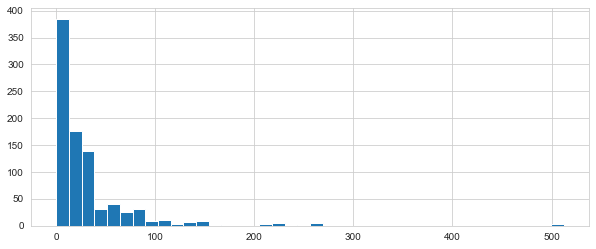

In [93]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [94]:
import cufflinks as cf
cf.go_offline()

In [95]:
train['Fare'].iplot(kind='hist', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

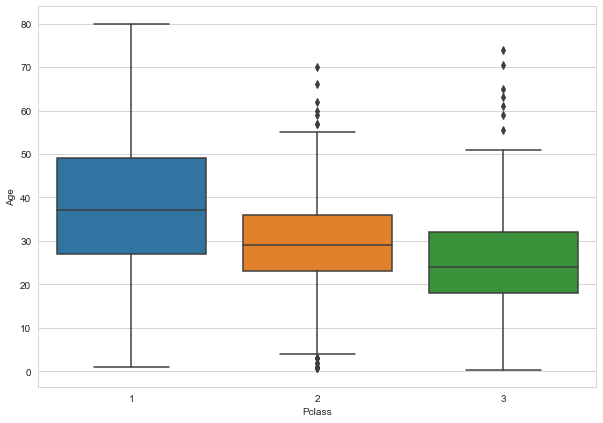

In [96]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [97]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:    # returning the average age according to class of the passengers
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24  
    else:
        return Age

In [98]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

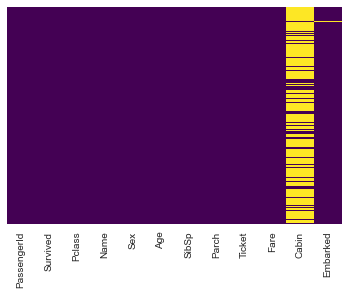

In [99]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')  # we have now no missing age values, we put in values avg based on thier class

In [100]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [101]:
train.dropna(inplace = True)  # we are cleaning our data completely, we dont want any missing values

<AxesSubplot:>

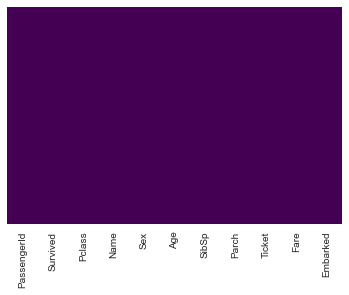

In [102]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

In [103]:
# The sex column has males and females(while Ml algo can't) so we convert into 1 & 0's via dummy variables.
pd.get_dummies(train['Sex'])

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[889 rows x 2 columns]

In [104]:
sex = pd.get_dummies(train['Sex'], drop_first=True)  # we just want to feed 1 column to out ML algo
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [105]:
embark =  pd.get_dummies(train['Embarked'], drop_first=True)  # The 'c' column has been dropped
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [106]:
train = pd.concat([train, sex, embark], axis = 1)
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  male  Q  S  
0      0  A/5 21171   7.2500        S     1  0  1  
1      0   PC 17599  71.2833        C     0  0  0

In [107]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True) # Dropping the columns we dont need or which we taken info already from like sex and embarked
train.head()   # Pclass is also having values 1,2,3 we can put them in dummy variable as well

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [114]:
X = train.drop('Survived', axis=1)
y = train['Survived']    # y is the column you want to predict

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Shashwat Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [119]:
predictions = logmodel.predict(X_test)

In [120]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.83      0.71      0.77       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 30,  74]], dtype=int64)